In [21]:
import json
import pandas as pd
import re

# run only for parsing the input txt file data for the first time, later use the below read_csv line to open existing csv
#File paths
input_file = 'C:\\Users\\rohit\\Desktop\\HiWi\Work\\Radar Sensor Project\\py_mmwave_dev\\py_mmwave_plot\\log\\robomaster_node_x_mmwave_sensor_20240723_170609.txt'

match = re.search(r'sensor_(\d{8}_\d{6})', input_file)
if match:
    timestamp_part = match.group(1)
else:
    raise ValueError("No timestamp found in the input file path")

#output_file = f'{timestamp_part}_parsed_data.csv'

# uncomment if parsed data csv is already created
# df = pd.read_csv('path_to_csv_file.csv')


#Initializing
data_list = []

#Read data file and parse the JSON data
with open(input_file, 'r') as file:
    for line in file:
        data = json.loads(line.strip())
        timestamp = data['timestamp']
        numObj = data['numObj']
        
        # Create a row for each object
        for i in range(numObj):
            row = {
                'timestamp': timestamp,
                'range': data['range'][i],
                'azimuth': data['azimuth'][i],
                'elevation': data['elevation'][i],
                'x': data['x'][i],
                'y': data['y'][i],
                'z': data['z'][i],
                'v': data['v'][i],
                'snr': data['snr'][i],
                'rangeProfile': data['rangeProfile'],
            }
            data_list.append(row)

#Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data_list)

#Displaying the DataFrame
print(df.head())

#CSV output of DataFrame
#df.to_csv(output_file, index=False)

      timestamp     range    azimuth  elevation      x      y      z    v  \
0  1.721747e+09  0.697293 -26.452780  10.912134 -0.305  0.613  0.132  0.0   
1  1.721747e+09  1.919075  -9.365245  16.125244 -0.300  1.819  0.533  0.0   
2  1.721747e+09  2.921451 -11.081350  12.594075 -0.548  2.798  0.637  0.0   
3  1.721747e+09  3.968269 -50.698015  14.267841 -2.976  2.436  0.978  0.0   
4  1.721747e+09  0.697293 -26.452780  10.912134 -0.305  0.613  0.132  0.0   

    snr                                       rangeProfile  
0  16.3  [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...  
1  16.1  [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...  
2  25.4  [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...  
3  12.3  [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...  
4  16.3  [25.493, 32.957, 36.296, 35.982, 32.674, 27.39...  


In [2]:
print(df.timestamp)
print(df.range)
print(df.azimuth)

0        1.721747e+09
1        1.721747e+09
2        1.721747e+09
3        1.721747e+09
4        1.721747e+09
             ...     
10984    1.721747e+09
10985    1.721747e+09
10986    1.721747e+09
10987    1.721747e+09
10988    1.721747e+09
Name: timestamp, Length: 10989, dtype: float64
0        0.697293
1        1.919075
2        2.921451
3        3.968269
4        0.697293
           ...   
10984    3.619457
10985    4.535319
10986    1.569574
10987    3.619254
10988    4.535179
Name: range, Length: 10989, dtype: float64
0       -26.452780
1        -9.365245
2       -11.081350
3       -50.698015
4       -26.452780
           ...    
10984   -22.935015
10985    56.241813
10986    18.446625
10987   -22.928605
10988    56.274067
Name: azimuth, Length: 10989, dtype: float64


### Visualizing: Heatmap ### 

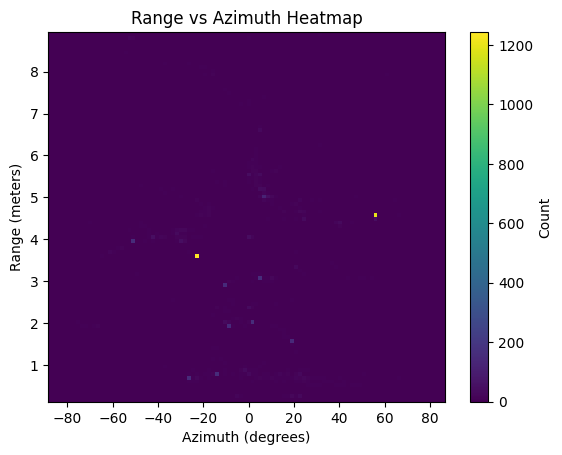

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.hist2d(df['azimuth'], df['range'], bins=[100, 100], cmap='viridis')

plt.colorbar(label='Count')

#Labels
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Range (meters)')
plt.title('Range vs Azimuth Heatmap')

plt.show()

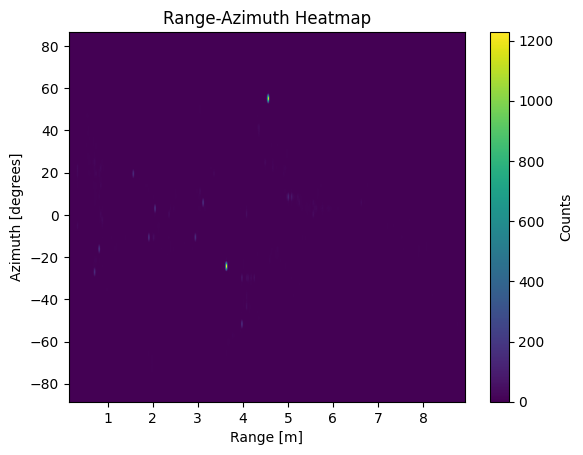

In [4]:
# Create 2D histogram
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(256, 64))

# Plot the heatmap
#fig, ax = plt.subplots(figsize=(10, 8))
fig, ax = plt.subplots()
cax = ax.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# Add color bar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Counts')

# Set labels
ax.set_xlabel('Range [m]')
ax.set_ylabel('Azimuth [degrees]')
ax.set_title('Range-Azimuth Heatmap')

plt.show()

ValueError: different number of values and points

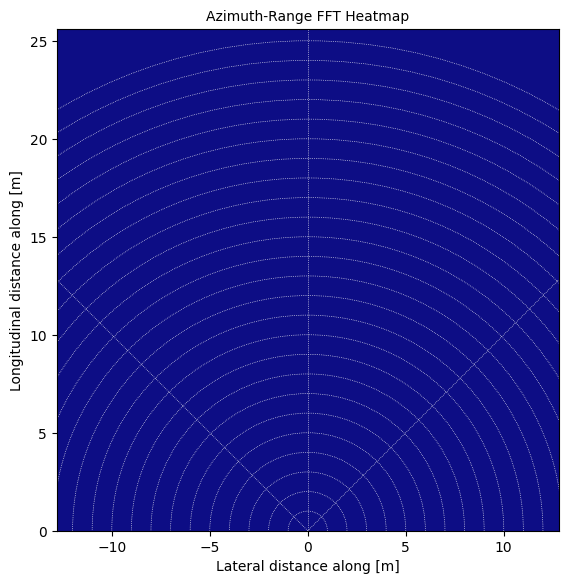

In [5]:
import numpy as np
import pandas as pd
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.widgets as wgt

# Assuming df is your DataFrame already loaded
# Example:
# df = pd.read_csv('path_to_your_dataframe.csv') # Uncomment if you need to read the DataFrame from a CSV file

# Parameters (Adjust these based on your requirements)
tx_azimuth_antennas = 4
rx_antennas = 4
range_bins = 256
angle_bins = 64
range_res = 0.1  # Adjust based on your data
range_bias = 0

# Create 2D grid for interpolation
t = np.array(range(-angle_bins//2 + 1, angle_bins//2)) * (2 / angle_bins)
t = np.arcsin(t)
r = np.array(range(range_bins)) * range_res

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

x = np.array([r]).T * np.sin(t)
y = np.array([r]).T * np.cos(t)
y = y - range_bias

# Plotting
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(((0,)*grid_res,) * grid_res, cmap=plt.cm.jet, extent=[-range_width, +range_width, 0, range_depth], alpha=0.95)

cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap'.format(angle_bins, range_bins), fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

ax.set_ylim([0, +range_depth])
ax.set_xlim([-range_width, +range_width])

for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

# Prepare data for heatmap
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(grid_res, grid_res))

# Interpolate data
zi = spi.griddata((x.ravel(), y.ravel()), heatmap.ravel(), (xi, yi), method='linear')
zi = zi[:-1, :-1]

cm.set_array(zi[::-1, ::-1])  # Rotate 180 degrees
cm.autoscale()  # Reset colormap

# Show plot
plt.show()




In [6]:
print(df.size)
print(df.azimuth.size)
print(df.range.size)

109890
10989
10989


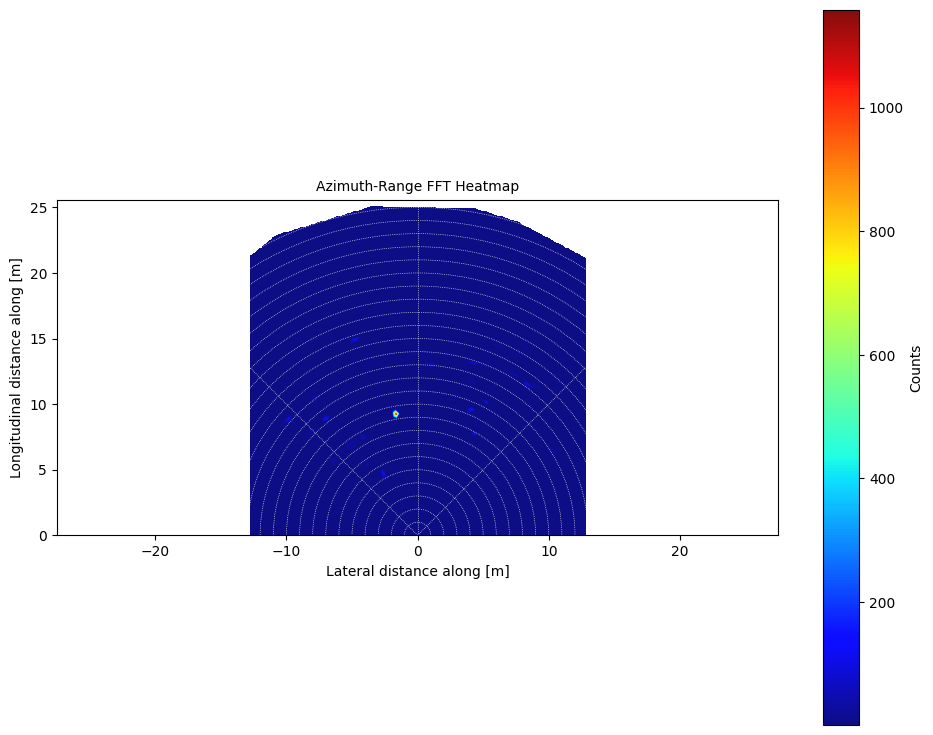

In [7]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
import matplotlib.widgets as wgt
import matplotlib.patches as pat

# Parameters
tx_azimuth_antennas = 4  
rx_antennas = 3  
range_bins = 256
angle_bins = 64
range_res = 0.1  
range_bias = 0.0 

# Calculate coordinates
t = np.linspace(-1, 1, angle_bins)
t = np.arcsin(t)
r = np.linspace(0, range_bins * range_res, range_bins)

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

#x and y for bins
x = np.outer(r, np.sin(t))
y = np.outer(r, np.cos(t))
y = y - range_bias

#2D histogram
heatmap, xedges, yedges = np.histogram2d(df['range'], df['azimuth'], bins=(range_bins, angle_bins))

#interpolation
x_points = x.ravel()
y_points = y.ravel()
values = heatmap.T.ravel()

#zero values filtered
mask = values > 0
x_points = x_points[mask]
y_points = y_points[mask]
values = values[mask]

zi = spi.griddata((x_points, y_points), values, (xi, yi), method='linear')
zi = zi[:-1, :-1]

#plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(zi[::-1, ::-1], cmap=plt.cm.jet, extent=[-range_width, range_width, 0, range_depth], alpha=0.95)
cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap'.format(angle_bins, range_bins), fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

#grid lines
ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

#range circles
for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

plt.colorbar(cm, ax=ax, label='Counts')
plt.show()



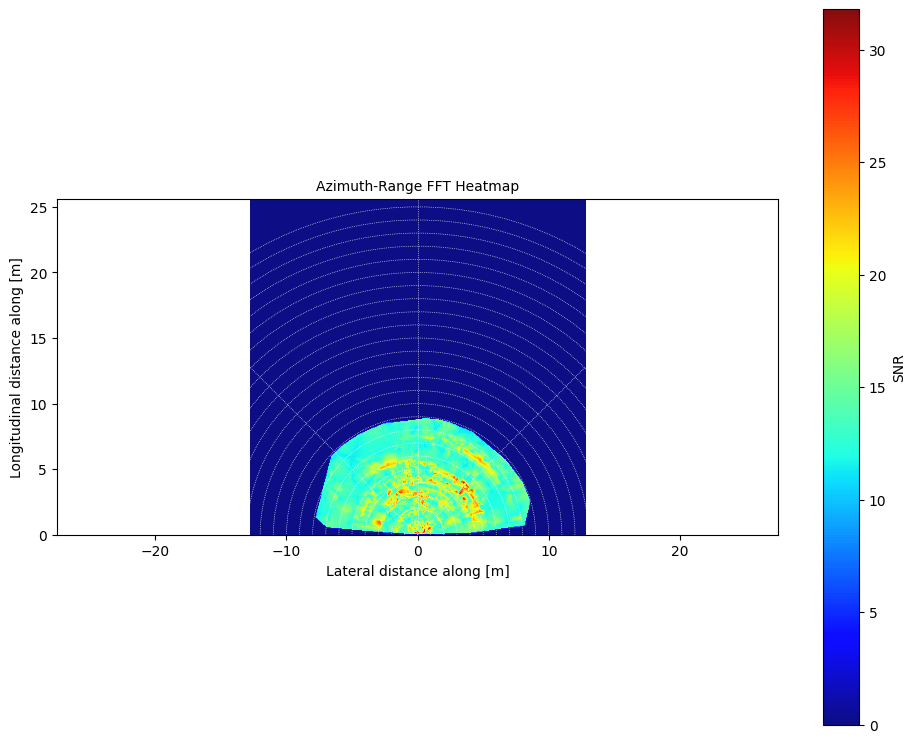

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import scipy.interpolate as spi
import pandas as pd  


# Parameters
tx_azimuth_antennas = 4  
rx_antennas = 4  
range_bins = 256
angle_bins = 64
range_res = 0.1  
range_bias = 0.0 

# Calculate coordinates
t = np.linspace(-1, 1, angle_bins)
t = np.arcsin(t)
r = np.linspace(0, range_bins * range_res, range_bins)

range_depth = range_bins * range_res
range_width, grid_res = range_depth / 2, 400

xi = np.linspace(-range_width, range_width, grid_res)
yi = np.linspace(0, range_depth, grid_res)
xi, yi = np.meshgrid(xi, yi)

# x and y for bins
x = np.outer(r, np.sin(t))
y = np.outer(r, np.cos(t))
y = y - range_bias

# Interpolation
azimuth_radians = np.radians(df['azimuth'])
x_points = df['range'] * np.sin(azimuth_radians)
y_points = df['range'] * np.cos(azimuth_radians)
values = df['snr']

# Interpolate SNR values
zi = spi.griddata((x_points, y_points), values, (xi, yi), method='linear')
zi = np.nan_to_num(zi)  # Replace NaN values with zero

# Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)

fig.tight_layout(pad=2)

cm = ax.imshow(zi[::-1, ::-1], cmap=plt.cm.jet, extent=[-range_width, range_width, 0, range_depth], alpha=0.95)
cursor = wgt.Cursor(ax, useblit=True, color='white', linewidth=1)

ax.set_title('Azimuth-Range FFT Heatmap', fontsize=10)
ax.set_xlabel('Lateral distance along [m]')
ax.set_ylabel('Longitudinal distance along [m]')

# Grid lines
ax.plot([0, 0], [0, range_depth], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, -range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)
ax.plot([0, +range_width], [0, range_width], color='white', linewidth=0.5, linestyle=':', zorder=1)

# Range circles
for i in range(1, int(range_depth)+1):
    ax.add_patch(pat.Arc((0, 0), width=i*2, height=i*2, angle=90, theta1=-90, theta2=90, color='white', linewidth=0.5, linestyle=':', zorder=1))

# Colorbar for SNR values
plt.colorbar(cm, ax=ax, label='SNR')
plt.show()

In [19]:
df.head

<bound method NDFrame.head of           timestamp     range    azimuth  elevation      x      y      z    v  \
0      1.721747e+09  0.697293 -26.452780  10.912134 -0.305  0.613  0.132  0.0   
1      1.721747e+09  1.919075  -9.365245  16.125244 -0.300  1.819  0.533  0.0   
2      1.721747e+09  2.921451 -11.081350  12.594075 -0.548  2.798  0.637  0.0   
3      1.721747e+09  3.968269 -50.698015  14.267841 -2.976  2.436  0.978  0.0   
4      1.721747e+09  0.697293 -26.452780  10.912134 -0.305  0.613  0.132  0.0   
...             ...       ...        ...        ...    ...    ...    ...  ...   
10984  1.721747e+09  3.619457 -22.935015  15.824571 -1.357  3.207  0.987  0.0   
10985  1.721747e+09  4.535319  56.241813  12.233281  3.685  2.463  0.961  0.0   
10986  1.721747e+09  1.569574  18.446625   8.647750  0.491  1.472  0.236  0.0   
10987  1.721747e+09  3.619254 -22.928605  15.759671 -1.357  3.208  0.983  0.0   
10988  1.721747e+09  4.535179  56.274067  12.324169  3.685  2.460  0.968  0.0  

### Range Profile ###

8.939672980596104


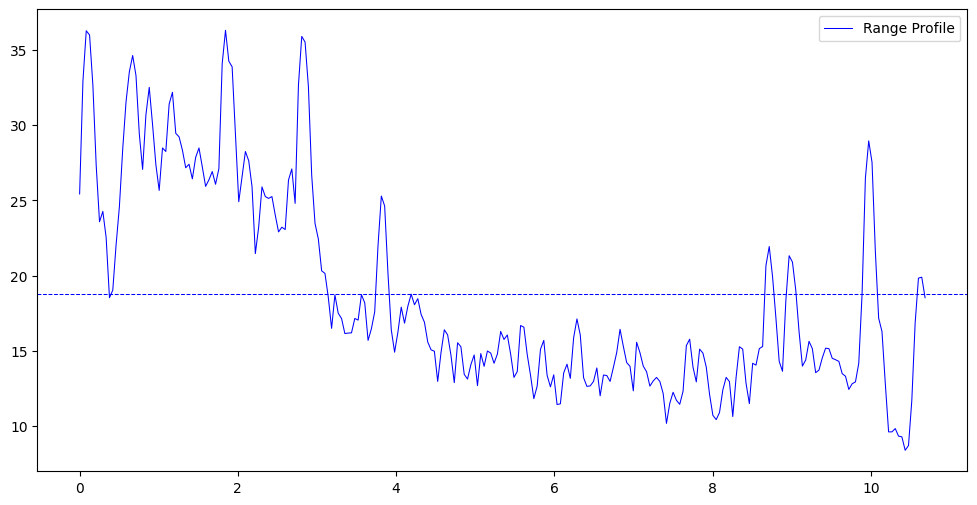

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example dataframe setup
# df = pd.read_csv('path_to_your_csv_file.csv')

def update(df, range_max=100, range_bias=0):
    ax.clear()

    # Prepare the range profile data
    if 'rangeProfile' in df.columns:
        y = df['rangeProfile'].values[0]  # Assuming you're interested in the first row for simplicity
        bin_size = range_max / len(y)
        x = [i * bin_size for i in range(len(y))]
        x = [v - range_bias for v in x]
        ax.plot(x, y, color='blue', linewidth=0.75, label='Range Profile')
        ax.axhline(y=np.mean(y), color='blue', linestyle='--', linewidth=0.75)
      
    ax.legend()

# Plotting setup
def start_plot(df, range_bias=0):
    fig = plt.figure(figsize=(12, 6))
    global ax
    ax = plt.subplot(1, 1, 1)
    
    fig.canvas.manager.set_window_title('Range Profile')
                           
    ax.set_title('Range Profile', fontsize=10)
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Relative power [dB]')
    
    # Determine a good value for range_max
    max_range_value = df['range'].max()
    print(max_range_value)
    range_max = max_range_value * 1.2  # Adding 20% buffer to range values
    
    ax.set_xlim([0, range_max])
    ax.set_ylim([0, 100])
    ax.set_yticks(range(0, 101, 10))
    ax.grid(linestyle=':')
    
    # Update plot with data
    update(df, range_max, range_bias)
    
    plt.show()

# Example usage
# df = pd.read_csv('path_to_your_csv_file.csv')
start_plot(df)


In [41]:
df.rangeProfile

0        [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...
1        [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...
2        [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...
3        [25.431, 32.941, 36.28, 35.998, 32.659, 27.328...
4        [25.493, 32.957, 36.296, 35.982, 32.674, 27.39...
                               ...                        
10984    [25.525, 32.862, 36.124, 35.888, 32.596, 27.45...
10985    [25.525, 32.862, 36.124, 35.888, 32.596, 27.45...
10986    [25.493, 32.878, 36.124, 35.873, 32.549, 27.42...
10987    [25.493, 32.878, 36.124, 35.873, 32.549, 27.42...
10988    [25.493, 32.878, 36.124, 35.873, 32.549, 27.42...
Name: rangeProfile, Length: 10989, dtype: object